# Notebook 3A - Introduction to Model Interpretability
---

COSCI 222 - Machine Learning 2

*Prepared by Leodegario U. Lorenzo II, updated by Kenneth T. Co*

# 1.0 Introduction to Model Interpretability
---
Throughout the **Machine Learning 1** course, we learned all about different machine learning algorithms- how they work, how we can hypertune their hyperparameters, and how we can select the optimal model through a cross validation strategy. In the end, we can now train a machine learning model and use it to make predictions on unseen data (see Figure <a href='#fig:ml-nutshell'>1</a>).

<a name='fig:ml-nutshell'></a>
<div>
<img src="figures/ml-nutshell.png" align="left" width="600"/>
</div>

<br style="clear:both" />

<div>
    <p style="font-size:12px;font-style:default;">
        <b>Figure 1. Training and testing a machine learning model in a nutshell.</b><br>
        We learned how to train a machine learning model and use it to predict unseen data.
    </p>
</div>

<br style="clear:both" />

However, our methodology is currently geared more towards only optimizing the predictive power of our models and less on how we can use our models for inference. In times where stakeholders require us to explain the predictions of our machine learning model, our current methodology will be insufficient. In particular, we lack the capacity to answer questions such as:

- How does one (or more) feature impact the predictions of the model?
- What is the role that each feature value play in each individual predictions?
- How can we explain the model's predictions in a more useful manner for our stakeholders?

We will deal with methods that improves the explainability of our models in the next series of notebooks. For our first notebook on interpretability, a brief introduction on model interpretability and its importance will be emphasized. We also show in the concluding section of this notebook how we can incorporate these explainability methods on our machine learning pipeline.

## 1.1 What is model interpretability?

In Christoph Molnar's [Interpretable Machine Learning](#ref:molnar) book [[1]](#ref:molnar), he collated two definitions of **interpretability**. A non-mathematical one:

> *Interpretability is the degree to which a* ***human*** *can* ***understand*** *the cause of a* ***decision***. [[2]](#ref:miller)

And a mathematical one:

> *Interpretability is the degree to which a* ***human*** *can consistently* ***predict*** *the* ***model’s result***. [[3]](#ref:kim)

In both definitions we see three important elements: the **human**, the **understanding**, and the **decision**. Thus, in the same way, when we construct our definition for *interpretability* in the context of machine learning:

> ***Model interpretability*** *refers to the degree in which the behaviors and tendencies of statistical and machine learning models are understandable to humans.*

Notice here that there is a *flexibility* in the definition of model interpretability. Indeed, defining how explicable a machine learning model is depends on the needs and requirements of a project and the different stakeholders. Nevertheless, as ethical machine learning practitioners and data science leaders, model interpretability MUST be integrated as early as possible in the development process and should NOT just be taken as an afterthought.

## 1.2 Why interpretability?

Now, one might ask, why bother with interpretability? Wouldn't a high model performance would ultimately yield to higher business value? This is quite a arguable topic! In fact, in 2017, the [Neural Information Processing Systems](https://nips.cc/) conference in 2017 had its first ever ***The Great AI Debate*** with the topic ***Is interpretability necessary for machine learning?*** [[4]](#ref:great-ai-debate) *(you are highly encourage to watch this engaging and insightful discussion* 🙂).

In the video, it was shown that model interpretability is crucial especially for some applications where quirky patterns from the data may be learned by the model. Indeed, having an interpretability pipeline in your project gives you, the Data Scientist, the ability to debug your model and identify issues early on. Thus, giving you a chance to improve your model. Furthermore, it has added benefits for other stakeholders that is interested and affected by your machine learning model (see Figure [2](#fig:stakeholders)).

<a name='fig:stakeholders'></a>
<div>
<img src="figures/interpretability-stakeholders.png" align="left" width="700"/>
</div>

<br style="clear:both" />
<br style="clear:both" />

<div>
    <p style="font-size:12px;font-style:default;">
        <b>Figure 2. Benefits of model interpretability to various stakeholders of a machine learning project.</b><br>
           Model interpretability benefits the data scientist, business decision makers, approving authorities, and business customers.
    </p>
</div>

For **data scientists**, being able to explain the model to other stakeholders is also one benefit of having model explicability. The better you can explain the model to other people in the business, the greater its chance of being adopted and the trust given to the model by other stakeholders. With model interpretability, **business executives** now has the option to provide transparency to its end-users. Furthermore, it helps them justify the business case for the investment and identify other potential extensions and business use-case for the project. **Approving authorities** also benefit from model interpretability, by having a clear understanding of the risk the business is going to take in adopting the model, understanding the impact of the model decisions to humans, and anticipate any legal or regulatory issues that the model may face. Finally, **customer** experience and decision making can also be improved if they understand why a model gives a certain prediction.

<div class="alert alert-info">

### Discussion Points

Here, we outlined the benefits of having an interpretability pipeline in our machine learning projects. Can you think of cases where having model interpretability is NOT preferred? Give a particular instance where having model interpretability can do more harm than good.

</div>

## 1.3 What makes a good explanation?

Before we begin explaining predictions of machine learning models, it helps to understand what makes an explanation good an acceptable for humans. We are making explanations, after all, for a humans to be digested. This help us better frame the model explanations we get from model interpretability methods.

Here are some of the few important characteristics of a good explanation *(see Chapter 3.6 of Molnar's Interpretable Machine Learning for a complete list [[1]](#ref:molnar))*:

1. **Contrastive** - Model explanations must be able to answer *why a given prediction has been made in place of another prediction*. For example, in a model that recommends whether an individual be given a loan or not, a good explanation must be able to tell *what factors should/could I change to alter the model prediction*.
2. **Selective** - We *humans are only capable to comprehend 2 to 3 variables at a time*. Thus, a good model explanation must be able to *list the important drivers to explain an outcome*. Imagine having an interpretable model such as linear regression or decision trees, but an explanation that looks at hundreds or thousands of variables, it would be really hard for any human to digest that explanation!
3. **Consistent with prior beliefs** - Model explanations are greatly affected by how people perceived them. As such, when *an explanation is consistent with the prior beliefs of an individual*, they tend to favor such explanation ( also known as **confirmation bias**). This is not to discredit any novel or serendipitous discoveries of the model explanation. However, having an explanation that is in line with a domain expert, helps in the model's adoption. Furthermore, if a model is found to exhibit behavior inconsistent with the domain expert's belief, we can enforce constraints on the model or use a linear model that has the required property.

<div class="alert alert-info">

### Discussion Points

Among the interpretability methods that you currently know, can you create model explanations that satisfies all of the three characteristics we discussed above?

</div>

## 1.4 Types of Explainability Methods

Model interpretability methods can be classified according to three different criteria (see Figure 5) [[5]](#ref:bbox-peek):

<a name='fig:taxonomy'></a>
<div>
<img src="figures/taxonomy.png" align="left" width="550"/>
</div>

<br style="clear:both" />
<br style="clear:both" />

<div>
    <p style="font-size:12px;font-style:default;">
        <b>Figure 3. Taxonomy of different explainability methods.</b><br>
           Model interpretability or explainability methods can be intrinsic or post-hoc, model-specific or model-agnostic, local or global. Model-agnostic methods can be further classified whether they use surrogate models or are just visualizations of the behavior of the black-box model.
    </p>
</div>

First, we can classify whether the method stems from the model being **intrinsically** interpretable. If the model is not intrinsically interpretable, then the explanation method can be applied **post-hoc** or post-model training. Examples of intrinsically interpretable models include: Linear models, Decision Tree, and Rule-based models ([RuleFit](https://github.com/rohan-gt/rulefit) [[6]](#ref:rulefit)).

We can further classify the method whether it is **model-specific** or **model-agnostic** (intrinsic explainability methods are model-specific by definition). Model agnostic means that the explainability method can be applied to any black box models.

Finally, we can classify an explainability method whether it is a **global** explanation - i.e., it explains the whole model behavior (ex. feature importance and summary visualizations), or whether it is a **local** explanation, i.e., it explains a particular instance in the test or train dataset.

# 2.0 Predictive & Explanatory Modeling

---

Two of the models we introduced in Machine Learning 1 can be considered as intrinsically explainable models, i.e., Decision Trees and Linear Regression models. However, we've only presented them in the context of maximizing the prediction accuracy that we got from those models. For us to reframe their utility in terms of explainability, we need to first differentiate what we mean by using models for prediction versus explanation [[7]](#ref:predict-explain).

- **Predictive Modeling** - *process of applying a statistical model or machine learning model to data for the purpose of predicting new or future observations*. As such, the goal for predictive modeling is to minimize the combination of bias and estimation variance to obtain the required empirical precision.

- **Explanatory Modeling** - *process of applying (usually) statistical models to data to validate hypothesis about the theoretical constructs of the data generation process*. The focus for explanatory modeling is to minimize bias to obtain the most accurate representation of the underlying theory.

To see how these differ, let's look at two different pipelines in the succeeding subsections - one will focus on predictive modeling (as usual), while the other would heavily focus on explanatory modeling.

We'll set our data generation process to be linear for our analysis to emphasize the difference between the two pipeline:

\begin{equation}
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2^3 + \epsilon
\end{equation}

In [1]:
import numpy as np

# Sklearn make regressions allows us to generate a random regression problem
from sklearn.datasets import make_regression

# Generate 2000 samples using the model:
# y = b_2 X_2^3 + b_1 X_1 + 0.77
# while adding 4.50 noise to the target.
#
# Notice we name the output data matrix as X_processed, this is because
# we will take the cube root of second feature to simulate a linear
# dependence on X_2^3.
X_processed, y, coef = make_regression(
    n_samples=200,
    n_features=2,
    bias=0.77,
    coef=True,
    noise=4.50,
    random_state=1337
)
X = np.array([X_processed[:, 0], np.cbrt(X_processed[:, 1])]).T

## 2.1 Predictive Modeling

A predictive modeling pipeline would proceed as follows (for the model experimentation and evaluation step):

1. Hold-out test set segregation - setting out a hold-out test set for evaluation
2. Model selection - shortlisting which models to use
3. Cross validation design - how to perform cross validation
4. Hyperparameter tuning - deciding which optimal model to use

Let us use 20% of the dataset as our hold-out set.

In [2]:
from sklearn.model_selection import train_test_split

X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=0.20, random_state=1337)

Suppose we decided to use the following models:

1. Ridge Regression
2. Linear SVM
3. Nonlinear SVM

Then hypertune the `C` or `alpha` of the model along the range of `[1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05]`.


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Define C and alpha hyperparameter range
C_range = np.logspace(-5, 5, 6)

# Prepare the pipeline and parameter grid
pipe = Pipeline([('clf', Ridge())])
param_grid = [
    {'clf': [Ridge(random_state=1337)], 'clf__alpha': C_range},
    {'clf': [SVR()], 'clf__kernel': ['linear', 'rbf'], 'clf__C': C_range}
]

Next, let's find the optimal model for this case using a 5-fold cross validation strategy using `r2` as our metric.

In [4]:
from sklearn.model_selection import GridSearchCV

# Grid search using 5-fold CV with r2 scoring metric
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    return_train_score=True
)
grid_search.fit(X_trainval, y_trainval)
print(f"The best model is: {grid_search.best_params_}")
print(f"with an R^2 score of: {grid_search.best_score_}")

The best model is: {'clf': SVR(C=1000.0), 'clf__C': 1000.0, 'clf__kernel': 'rbf'}
with an R^2 score of: 0.9789209349232383


Using this model to evaluate the performance of our model to the test set, we get,

In [5]:
best_model = grid_search.best_estimator_
best_model.score(X_holdout, y_holdout)

0.9914165988880604

At this point, we've attained the objective of our predictive modeling exercise. We've optimized towards empirical precision and found that our model's performance during cross validation is comparable with its performance on the hold-out test set. However, notice that our optimal model here is a non-linear SVR with an RBF kernel. In terms of predictive performance, this is the optimal model. However, for explicability, this model might not be the best.

## 2.2 Explanatory Modeling

A crucial component of explanatory modeling is the statistical model that tries to recreate the underlying data generating process of the system of interest. This model not only has to be interpretable but the relationship between the target and predictive features should be clearly specified. As such, one of the common explanatory model to use are linear regression models. Simply put, a linear regression model predicts the target as a weighted sum of feature inputs.
$$
y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p + \epsilon
$$
This feature of linear regression is both its strength and weakness. The simplicity of the linear regression model comes with several assumptions. Recall that these assumptions are [[8]](#ref:degroot):

1. **Normality** - The conditional distribution of $y$ given predictors $x_i$ is a normal distribution.
2. **Linearity** - The relationship between the outcome $y$ and features $x_i$ is linear.
3. **Common Variance (Homoscedasticity)** - There is a parameter $\sigma^2$ such that the conditional variance of $y$ given any $x_i$ is $\sigma^2$.
4. **Independence** - Observations are independent of each other.

As such, the pipeline of explanatory modeling involves making sure that these assumptions should hold given that we are trying to use the linear regression model to explain how we've obtained our current observations. This can be summarized as follows:

1. Ensuring gaussian outcomes - for non-Gaussian outcomes, a transformation is done on the outcome variable but the weighted sum of features is kept intact.
2. Accounting for interactions - features may not be totally independent from one another. As such, we can perform feature-crossing to describe these interactions.
3. Modeling nonlinear features - techniques such as feature interaction, feature bucketization, and GAMs (Generalized Additive Models) may be used to account for nonlinear features.


<div class="alert alert-danger">

**IMPORTANT!!** - One major difference between explanatory modeling and predictive modeling is that for explanatory models, we are only concerned with the full dataset. No hold-out test set nor cross validation evaluation strategy will be needed since we only focus on recreating the data generation process using our chosen statistical model.
</div>

Let's take the case that we perform feature transformation to satisfy the assumption of the linear model when we describe our observations:

In [6]:
X_trans = np.array([X[:, 0], X[:, 1]**3]).T # this is magic! There is an arduous iterative process to get to this point.

We then fit a linear regression on this transformed features to get our explanatory model.

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_trans, y);

Using this linear model, we can then use this as basis for recreating how each feature contributes toward each corresponding outcome.

In [8]:
lin_reg.coef_

array([33.01817226, 87.00025353])

Comparing this with the actual data generating process, we are not too very far off! Which means we've attained the objective of explanatory modeling.

In [9]:
coef

array([32.63936755, 87.21220272])

## 2.3 Trade-offs in Modeling

We've established the differences between the goals of predictive versus explanatory modeling. Notice that more often than not, when we focus on predictive accuracy, we sacrifice theoretical accuracy for improved empirical precision. Indeed, when it comes to choosing the model with the highest predictive accuracy, the optimal models are not the most interpretable. (see Figure <a href='#fig:accuracy-interpretability'>2</a>) [[9]](#ref:interpret-ml).

<a name='fig:accuracy-interpretability'></a>
<div>
<img src="figures/accuracy-interpretability-trade-off.PNG" align="left" width="450"/>
</div>

<br style="clear:both" />

<div>
    <p style="font-size:12px;font-style:default;">
        <b>Figure 2. Machine learning model accuracy and interpretability tradeoff.</b><br>
           Models that are highly accurate are the least interpretable, while models that are highly interpretable have a sub-par accuracy [<a href='#ref:interpret-ml'>9</a>].
    </p>
</div>

However, what if the business requirements insist that our models be strong in both predictive and explanatory capabilities? Are there ways in which we can use the optimal model found during our predictive modeling pipeline but still be able to explain the predictions of our model?

Yes, we can––by using <b>model-agnostic post-hoc models</b>! We demonstrate in the next few cells how we can accomplish this using SHAP (SHapley Additive exPlanations).

In [10]:
import shap

explainer = shap.KernelExplainer(best_model.predict, X)
shap_values = explainer.shap_values(X)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

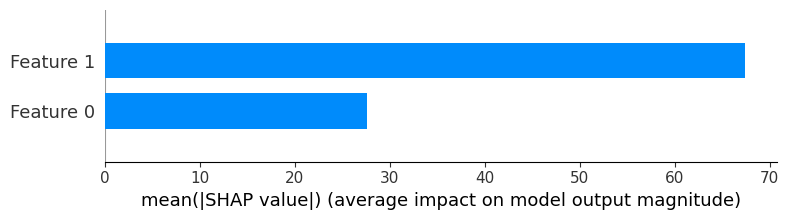

In [11]:
shap.summary_plot(shap_values=shap_values, features=X, plot_type='bar')

Printing and comparing the actual mean absolute SHAP with the coefficient of the data generating process, we get,

In [12]:
print(f"mean(|SHAP value|) {abs(shap_values).mean(axis=0)}")
print(f"actual coef: {coef}")

mean(|SHAP value|) [27.61338783 67.41482811]
actual coef: [32.63936755 87.21220272]


Magnitude-wise, they may differ to some degree, but the general behavior wherein $X_2$ has a greater effect than $X_1$ was captured by our explainability method.

This is just one way we can use SHAP to explain any black box model we have trained during our model experimentation. We will discuss how SHAP works and its other functionalities in Notebook 2C.

<div class="alert alert-block alert-info">

# ⚠️ Checkpoint ⚠️
In the next 5 minutes, discuss the following with your LT:

1. Why or when does **model interpretability** matter?
2. What is the difference between **Predictive and Explanatory** modeling? Why is this distinction important?
</div>

# References
- <a name='ref:molnar'></a> [1] Molnar, Christoph. “Interpretable machine learning. A Guide for Making Black Box Models Explainable”, 2019. https://christophm.github.io/interpretable-ml-book/.
- <a name='ref:miller'></a> [2] Miller, Tim. “Explanation in artificial intelligence: Insights from the social sciences.” *arXiv Preprint arXiv:1706.07269.* (2017)
- <a name='ref:kim'></a> [3] Kim, Been, Rajiv Khanna, and Oluwasanmi O. Koyejo. “Examples are not enough, learn to criticize! Criticism for interpretability.” *Advances in Neural Information Processing Systems* (2016).
- <a name='ref:great-ai-debate'></a> [4] NeurIPS 2017. “The Great AI Debate - NIPS2017 - Yann LeCun.” *YouTube*, uploaded by The Artificial Intelligence Channel, 1 February 2018, https://youtu.be/93Xv8vJ2acI.
- <a name='ref:bbox-peek'></a> [5] Adadi, Amina, and Mohammed Berrada. "Peeking inside the black-box: a survey on explainable artificial intelligence (XAI)." *IEEE access 6* (2018): 52138-52160.
- <a name='ref:rulefit'></a> [6] Friedman, Jerome H., and Bogdan E. Popescu. "Predictive learning via rule ensembles." The Annals of Applied Statistics 2.3 (2008): 916-954.
- <a name='ref:predict-explain'></a> [7] Shmueli G. *To explain or to predict?*. Statistical science. 2010 Aug;25(3):289-310.
- <a name='ref:degroot'></a> [8] DeGroot MH, Schervish MJ. Probability and statistics. Pearson Education; 2012.
- <a name='ref:interpret-ml'></a> [9] Guo, Mengzhuo, et al. "An interpretable machine learning framework for modelling human decision behavior." *arXiv preprint arXiv:1906.01233* (2019).